In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")

In [3]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
df.tail()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
499995,19-09-2025,Maharashtra,Satara,415212,0,1
499996,19-09-2025,Maharashtra,Satara,415312,0,5
499997,19-09-2025,Maharashtra,Satara,415510,0,3
499998,19-09-2025,Maharashtra,Satara,415511,0,10
499999,19-09-2025,Maharashtra,Satara,415516,0,3


## Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           500000 non-null  object
 1   state          500000 non-null  object
 2   district       500000 non-null  object
 3   pincode        500000 non-null  int64 
 4   demo_age_5_17  500000 non-null  int64 
 5   demo_age_17_   500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [6]:
df.shape

(500000, 6)

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [8]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375
2,2025-03-01,Gujarat,Rajkot,360006,65,765
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314
4,2025-03-01,Rajasthan,Udaipur,313801,45,785


## Creating total update column

In [9]:
df['total_update'] = df['demo_age_5_17'] + df['demo_age_17_']

In [10]:
df[['demo_age_5_17', 'demo_age_17_', 'total_update']].head()

,demo_age_5_17,demo_age_17_,total_update
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


## Age wise Demographic Updation

In [11]:
age_wise_updation = df[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
age_wise_updation.columns = ['Age_group', 'Total_Updation']
age_wise_updation

,Age_group,Total_Updation
0,demo_age_5_17,1437933
1,demo_age_17_,12857093


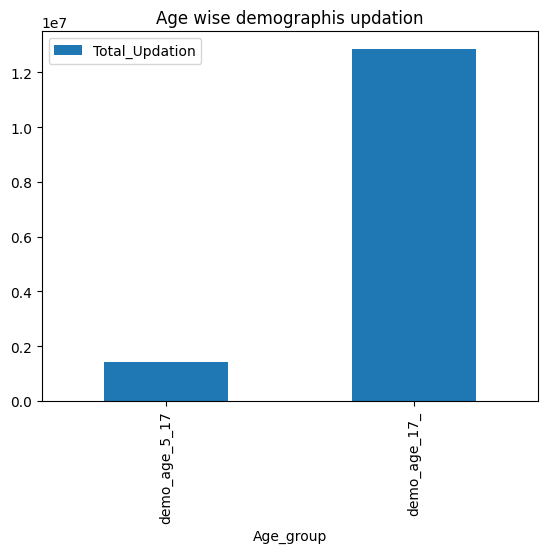

In [12]:
age_wise_updation.plot(kind = 'bar', x = 'Age_group', y = 'Total_Updation', title = 'Age wise demographis updation')
plt.show()

## State wise Updation

In [13]:
state_wise_demo_updation = (df.groupby('state')['total_update'].sum().sort_values(ascending=False))

### Top 10 States with Demographic Updates

In [14]:
state_wise_demo_updation.head(10).reset_index()

,state,total_update
0,Uttar Pradesh,2425595
1,Bihar,1352480
2,Maharashtra,1298657
3,West Bengal,1148832
4,Madhya Pradesh,923439
5,Rajasthan,881210
6,Andhra Pradesh,651751
7,Tamil Nadu,603481
8,Chhattisgarh,593671
9,Gujarat,560330


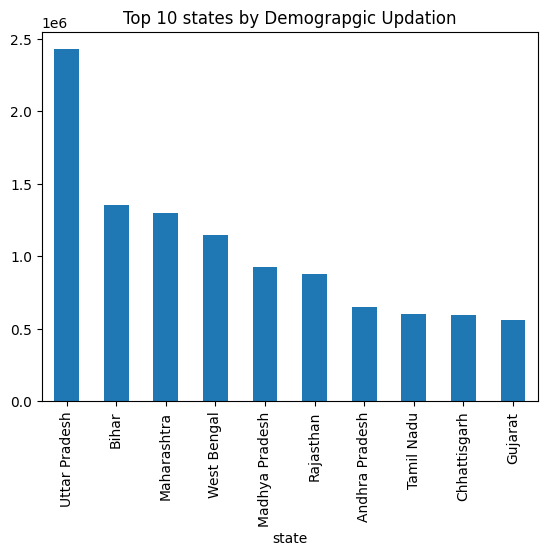

In [15]:
state_wise_demo_updation.head(10).plot(kind = 'bar', x='State', y='Total Update', title='Top 10 states by Demograpgic Updation')
plt.show()

### Bottom 10 States

In [16]:
bottom_10_states = state_wise_demo_updation.tail(10).reset_index()

In [17]:
bottom_10_states

,state,total_update
0,WEST BENGAL,18
1,West bengal,16
2,WESTBENGAL,10
3,ODISHA,10
4,west Bengal,5
5,odisha,4
6,Chhatisgarh,2
7,Darbhanga,2
8,West Bengli,1
9,Puttenahalli,1


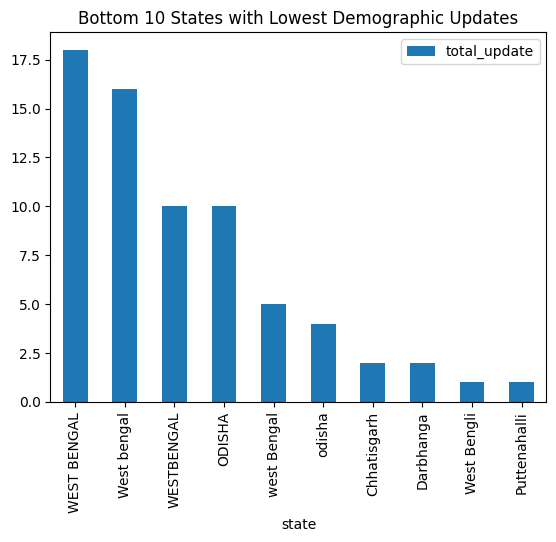

In [18]:
bottom_10_states.plot(kind = 'bar', x = 'state', y = 'total_update', title = 'Bottom 10 States with Lowest Demographic Updates')
plt.show()

## Let's see District Analysis

In [19]:
district_wise_demo_updation = (df.groupby('district')['total_update'].sum().sort_values(ascending=False))

### Top 10 District with highest Demographic updates

In [20]:
district_wise_demo_updation.head(10).reset_index()

,district,total_update
0,North West Delhi,137575
1,Surat,135755
2,South 24 Parganas,132441
3,Thane,129758
4,Pune,125331
5,Murshidabad,113214
6,West Delhi,103680
7,Jaipur,96979
8,Uttar Dinajpur,91052
9,Bengaluru,90722


### Bottom 10 District with Lowest Demographic updates

In [21]:
bottom_10_district = district_wise_demo_updation.tail(10).reset_index()
bottom_10_district

,district,total_update
0,Jajapur *,2
1,Raebareli,2
2,Baghpat *,1
3,Mohali,1
4,Balianta,1
5,Bally Jagachha,1
6,Rajauri,1
7,Dist : Thane,1
8,South DumDum(M),1
9,5th cross,1


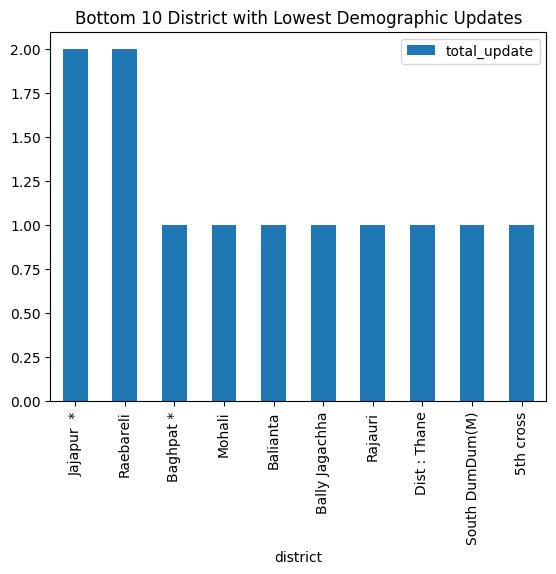

In [22]:
bottom_10_district.plot(kind='bar', x='district', y='total_update', title='Bottom 10 District with Lowest Demographic Updates')
plt.show()

### Date wise analysis

In [23]:
date_wise_updates = df.groupby('date')['total_update'].sum().sort_values(ascending=False)
date_wise_updates.head().reset_index()

,date,total_update
0,2025-03-01,3955754
1,2025-07-01,833063
2,2025-04-01,647631
3,2025-06-01,644305
4,2025-05-01,636913


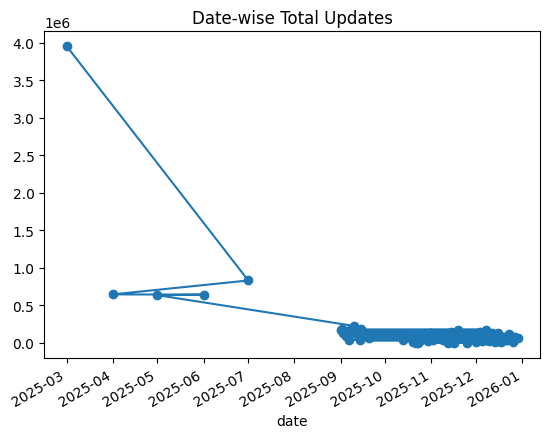

In [24]:
date_wise_updates.plot(kind='line', marker='o', title='Date-wise Total Updates')
plt.show()

#### On 2025-03-01 Highest Demographic Updates happened

### Pin-code wise Analysis

In [30]:
pincode_wise_updates = df.groupby('pincode')['total_update'].sum().sort_values(ascending=False)
pincode_wise_updates.head(10).reset_index()

,pincode,total_update
0,110094,51305
1,110059,47212
2,244001,45451
3,283203,43052
4,110086,42136
5,202001,32403
6,110041,29752
7,201102,29724
8,121004,28913
9,395006,27050


In [31]:
top_10_pincode_wise_updates = pincode_wise_updates.head(10).sort_values(ascending=False)

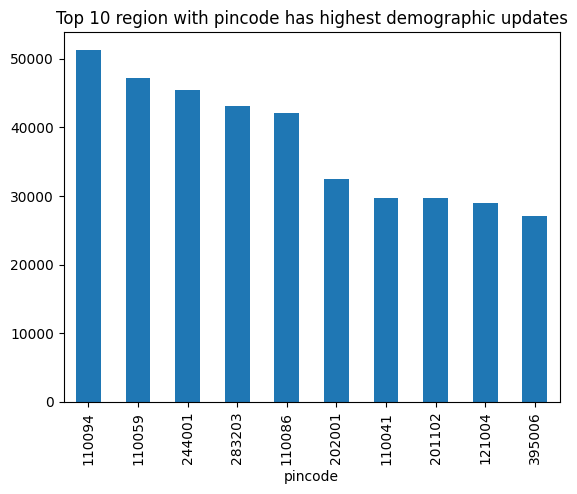

In [32]:
top_10_pincode_wise_updates.plot(kind='bar', x='pincode', y='total_update', title='Top 10 region with pincode has highest demographic updates')
plt.show()

#### At Pincode 110094 Highest Demographic updation happened

## Key Insights
- High update volumes are concentrated in populous states such as Uttar Pradesh and Bihar.
- Adult population (17+ age group) dominates Aadhaar updates
- Child age group (5–17) contributes a much smaller share
- Highly populated states record the highest updates
- States like Uttar Pradesh, Bihar, Maharashtra, and West Bengal show the highest number of Aadhaar demographic updates, which strongly correlates with   their large population size.
- Aadhaar updates vary across states and districts, showing regional differences.
- Some districts and PIN-code areas have higher update activity than others.
- Updates occur regularly over time, not on specific days only.
- Adult population (17+) contributes most of the Aadhaar updates, while children contribute less.
- On 2025-03-01 Highest Demographic Updates happened